### 📌 1. Import Libraries & Load Data

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "Electrcity_dataset.csv"  # Replace with your actual file path
raw_data = pd.read_csv(file_path)


### 📌 2. Data Preview

In [3]:
# Display the first few rows of the dataset to inspect its structure
print("Raw Data Overview:")
print(raw_data.head())


Raw Data Overview:
   Year  Renewable Energy Penetration (%)  \
0  2010                               6.9   
1  2011                               9.6   
2  2012                              11.3   
3  2013                              14.9   
4  2014                              19.1   

   Average Wholesale Electricity Price (£ /MWh)  Demand (MWh)  \
0                                         44.96      384882.0   
1                                         48.20      374362.0   
2                                         45.21      376359.0   
3                                         50.79      373830.0   
4                                         42.43      359683.0   

   Installed Renewable Capacity (MW)  
0                             9256.0  
1                            12382.0  
2                            15651.0  
3                            19961.0  
4                            24921.0  


### 📌 3. Data Cleaning

In [4]:
# Clean and prepare the dataset
# Rename columns for clarity (adjust these based on your dataset's structure)
raw_data.columns = ["Year", "Renewable Penetration (%)", "Wholesale Price (£/MWh)", "Demand (MWh)", "Installed Renewable Capacity (MW)"]


### 📌 4. Type Conversion & Calculations

In [5]:
# Drop rows with missing values in key columns (if any)
cleaned_data = raw_data.dropna(subset=["Year", "Renewable Penetration (%)", "Wholesale Price (£/MWh)"])


In [6]:
# Ensure data types are correct
cleaned_data["Year"] = cleaned_data["Year"].astype(int)
cleaned_data["Renewable Penetration (%)"] = cleaned_data["Renewable Penetration (%)"].astype(float)
cleaned_data["Wholesale Price (£/MWh)"] = cleaned_data["Wholesale Price (£/MWh)"].astype(float)



C:\Users\AHMAD\AppData\Local\Temp\ipykernel_17912\381897996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["Year"] = cleaned_data["Year"].astype(int)
C:\Users\AHMAD\AppData\Local\Temp\ipykernel_17912\381897996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["Renewable Penetration (%)"] = cleaned_data["Renewable Penetration (%)"].astype(float)
C:\Users\AHMAD\AppData\Local\Temp\ipykernel_17912\381897996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [9]:
# Ensure data types are correct using .loc
cleaned_data.loc[:, "Year"] = cleaned_data["Year"].astype(int)
cleaned_data.loc[:, "Renewable Penetration (%)"] = cleaned_data["Renewable Penetration (%)"].astype(float)
cleaned_data.loc[:, "Wholesale Price (£/MWh)"] = cleaned_data["Wholesale Price (£/MWh)"].astype(float)


In [10]:
# Display cleaned data
print("Cleaned Data Overview:")
print(cleaned_data.head())


Cleaned Data Overview:
   Year  Renewable Penetration (%)  Wholesale Price (£/MWh)  Demand (MWh)  \
0  2010                        6.9                    44.96      384882.0   
1  2011                        9.6                    48.20      374362.0   
2  2012                       11.3                    45.21      376359.0   
3  2013                       14.9                    50.79      373830.0   
4  2014                       19.1                    42.43      359683.0   

   Installed Renewable Capacity (MW)  Renewable Growth Rate (%)  \
0                             9256.0                        NaN   
1                            12382.0                  39.130435   
2                            15651.0                  17.708333   
3                            19961.0                  31.858407   
4                            24921.0                  28.187919   

   Price Change (%)  
0               NaN  
1          7.206406  
2         -6.203320  
3         12.342402  
4

In [11]:

# Calculate year-over-year growth rates for Renewable Penetration and Wholesale Prices
cleaned_data["Renewable Growth Rate (%)"] = cleaned_data["Renewable Penetration (%)"].pct_change() * 100
cleaned_data["Price Change (%)"] = cleaned_data["Wholesale Price (£/MWh)"].pct_change() * 100



C:\Users\AHMAD\AppData\Local\Temp\ipykernel_17912\1621977651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["Renewable Growth Rate (%)"] = cleaned_data["Renewable Penetration (%)"].pct_change() * 100
C:\Users\AHMAD\AppData\Local\Temp\ipykernel_17912\1621977651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["Price Change (%)"] = cleaned_data["Wholesale Price (£/MWh)"].pct_change() * 100


In [12]:

# Calculate year-over-year growth rates using .loc
cleaned_data.loc[:, "Renewable Growth Rate (%)"] = cleaned_data["Renewable Penetration (%)"].pct_change() * 100
cleaned_data.loc[:, "Price Change (%)"] = cleaned_data["Wholesale Price (£/MWh)"].pct_change() * 100


### 📌 5. Visualize Historical Trends

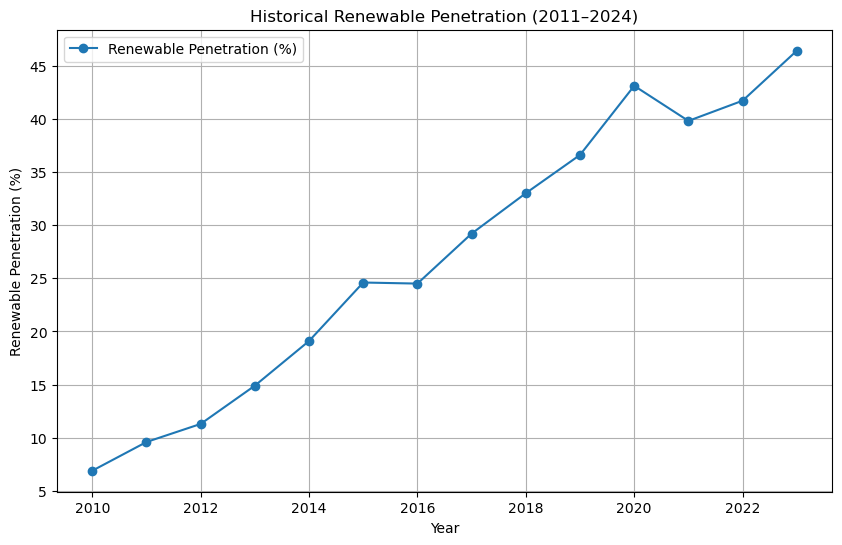

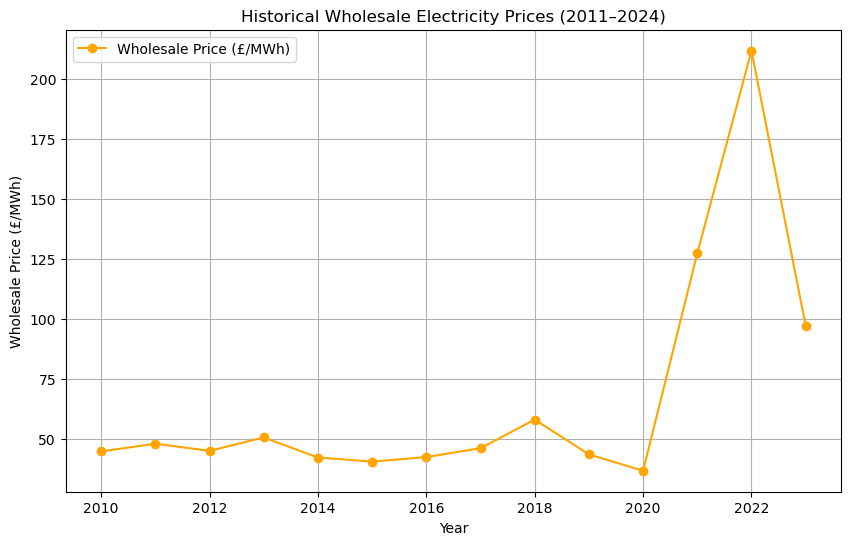

In [13]:

# Visualise historical trends
plt.figure(figsize=(10, 6))
plt.plot(cleaned_data["Year"], cleaned_data["Renewable Penetration (%)"], label="Renewable Penetration (%)", marker="o")
plt.title("Historical Renewable Penetration (2011–2024)")
plt.xlabel("Year")
plt.ylabel("Renewable Penetration (%)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cleaned_data["Year"], cleaned_data["Wholesale Price (£/MWh)"], label="Wholesale Price (£/MWh)", marker="o", color="orange")
plt.title("Historical Wholesale Electricity Prices (2011–2024)")
plt.xlabel("Year")
plt.ylabel("Wholesale Price (£/MWh)")
plt.grid(True)
plt.legend()
plt.show()



### 📌 6. Set Baseline Year (e.g., 2023 or fallback to mean)

In [14]:
# Extract baseline for projections (2024)
baseline_year = 2024
baseline_data = cleaned_data[cleaned_data["Year"] == baseline_year].iloc[0]
baseline_price = baseline_data["Wholesale Price (£/MWh)"]
baseline_renewable_penetration = baseline_data["Renewable Penetration (%)"]


IndexError: single positional indexer is out-of-bounds

In [15]:

# Check if the year 2024 exists in the DataFrame
if not cleaned_data[cleaned_data["Year"] == baseline_year].empty:
    baseline_data = cleaned_data[cleaned_data["Year"] == baseline_year].iloc[0]
    baseline_price = baseline_data["Wholesale Price (£/MWh)"]
    baseline_renewable_penetration = baseline_data["Renewable Penetration (%)"]
else:
    print(f"Year {baseline_year} does not exist in the dataset.")



Year 2024 does not exist in the dataset.


In [16]:
print(cleaned_data["Year"].unique())


[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [17]:
if not cleaned_data[cleaned_data["Year"] == baseline_year].empty:
    baseline_data = cleaned_data[cleaned_data["Year"] == baseline_year].iloc[0]
    baseline_price = baseline_data["Wholesale Price (£/MWh)"]
    baseline_renewable_penetration = baseline_data["Renewable Penetration (%)"]
else:
    print(f"Year {baseline_year} not found. Setting default baseline values.")
    baseline_price = cleaned_data["Wholesale Price (£/MWh)"].mean()  # Default to the average price
    baseline_renewable_penetration = cleaned_data["Renewable Penetration (%)"].mean()  # Default to the average penetration


Year 2024 not found. Setting default baseline values.


In [18]:

# Check if the year 2024 exists in the DataFrame
baseline_year = 2024

if not cleaned_data[cleaned_data["Year"] == baseline_year].empty:
    baseline_data = cleaned_data[cleaned_data["Year"] == baseline_year].iloc[0]
    baseline_price = baseline_data["Wholesale Price (£/MWh)"]
    baseline_renewable_penetration = baseline_data["Renewable Penetration (%)"]
else:
    print(f"Year {baseline_year} not found. Setting default baseline values.")
    # Set defaults based on the dataset's averages
    baseline_price = cleaned_data["Wholesale Price (£/MWh)"].mean()
    baseline_renewable_penetration = cleaned_data["Renewable Penetration (%)"].mean()

# Display the default baseline values
print(f"Baseline Price: £{baseline_price:.2f}/MWh")
print(f"Baseline Renewable Penetration: {baseline_renewable_penetration:.2f}%")


Year 2024 not found. Setting default baseline values.
Baseline Price: £66.91/MWh
Baseline Renewable Penetration: 27.19%


In [20]:
# Extract baseline for projections (2024)
baseline_year = 2023
baseline_data = cleaned_data[cleaned_data["Year"] == baseline_year].iloc[0]
baseline_price = baseline_data["Wholesale Price (£/MWh)"]
baseline_renewable_penetration = baseline_data["Renewable Penetration (%)"]



### 📌 7. Model Future Scenarios

In [21]:
# Define future scenarios for renewable penetration
future_years = np.arange(2025, 2041)  # 2025 to 2040
scenarios = {
    "High Renewables": np.linspace(baseline_renewable_penetration, 90, len(future_years)),
    "Moderate Renewables": np.linspace(baseline_renewable_penetration, 70, len(future_years)),
    "Low Renewables": np.linspace(baseline_renewable_penetration, 50, len(future_years)),
}



In [22]:
# Define reduction rates (merit-order effect sensitivity)
reduction_rates = {
    "High Renewables": 0.03,
    "Moderate Renewables": 0.02,
    "Low Renewables": 0.01,
}


In [23]:
# Project future prices based on merit-order effect
future_prices = {}
for scenario, penetration in scenarios.items():
    alpha = reduction_rates[scenario]
    future_prices[scenario] = baseline_price * np.exp(-alpha * (penetration - baseline_renewable_penetration))



In [24]:
# Combine projections into a DataFrame
projections_df = pd.DataFrame({
    "Year": future_years,
    "High Renewables Price (£/MWh)": future_prices["High Renewables"],
    "Moderate Renewables Price (£/MWh)": future_prices["Moderate Renewables"],
    "Low Renewables Price (£/MWh)": future_prices["Low Renewables"],
})


### 📌 8. Visualize Projections

Future Price Projections:
    Year  High Renewables Price (£/MWh)  Moderate Renewables Price (£/MWh)  \
0   2025                      97.300000                          97.300000   
1   2026                      89.174845                          94.285963   
2   2027                      81.728190                          91.365291   
3   2028                      74.903378                          88.535092   
4   2029                      68.648480                          85.792563   
5   2030                      62.915905                          83.134989   
6   2031                      57.662035                          80.559737   
7   2032                      52.846897                          78.064259   
8   2033                      48.433852                          75.646083   
9   2034                      44.389324                          73.302813   
10  2035                      40.682539                          71.032131   
11  2036                      37.28529

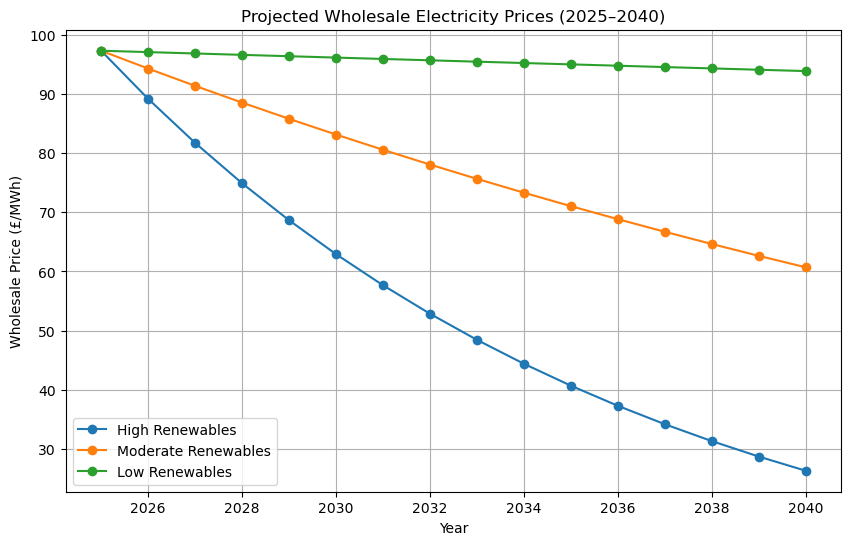

: 

In [25]:
# Display projections
print("Future Price Projections:")
print(projections_df)

# Visualize future price projections
plt.figure(figsize=(10, 6))
plt.plot(projections_df["Year"], projections_df["High Renewables Price (£/MWh)"], label="High Renewables", marker="o")
plt.plot(projections_df["Year"], projections_df["Moderate Renewables Price (£/MWh)"], label="Moderate Renewables", marker="o")
plt.plot(projections_df["Year"], projections_df["Low Renewables Price (£/MWh)"], label="Low Renewables", marker="o")
plt.title("Projected Wholesale Electricity Prices (2025–2040)")
plt.xlabel("Year")
plt.ylabel("Wholesale Price (£/MWh)")
plt.grid(True)
plt.legend()
plt.show()
